이번 과제는 **KNN 알고리즘**과 **K-Means 알고리즘**을 활용하여 데이터를 분석하는 것입니다.

과제는 두 가지 파트로 나누어져 있습니다:

#### 1. KNN 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- KNN 알고리즘을 구현하고, 하이퍼파라미터 튜닝을 통해 최적의 성능을 내는 모델을 구축해 보세요.
  - 다양한 distance metric을 사용해보세요.
- 모델의 성능을 평가한 뒤, 다양한 지표를 사용해 결과를 해석하세요.
- 추가적으로 Weighted KNN과 같은 변형된 알고리즘도 적용해 보세요 :)

#### 2. K-Means 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : Facebook Live sellers](https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo)
- K-Means 알고리즘을 사용해 clustering을 수행하세요.
  - 다양한 cluster 개수를 가지고 실험해 보세요.
- clustering 결과를 시각화하고, Elbow Method나 Silhouette Score 등을 활용해 clustering의 성능을 평가하세요.
- 추가적으로 K-Means++를 사용해 clustering을 진행해 보세요 :)



---

In [1]:
# 본인이 필요한 라이브러리 추가

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


# 1. KNN 과제

## 1. 데이터 로드

In [7]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/Users/suhyun/Desktop/대외활동/동아리/투빅스/정규세션/3주차/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. 데이터 전처리/EDA


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. KNN 구현 & 파라미터 튜닝


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 기본 KNN 모델 초기화
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# 예측 및 평가
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6623376623376623
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154



In [19]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearchCV를 통한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 파라미터 및 성능 출력
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# 최적의 모델로 예측 및 평가
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)
print("Best Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 9}
Best score: 0.7443422630947621
Best Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.78      0.79      0.78        99
           1       0.61      0.60      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



## 4. 평가

In [17]:
weighted_knn = KNeighborsClassifier(weights='distance', n_neighbors=5)
weighted_knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [21]:
y_pred_weighted = weighted_knn.predict(X_test)
print("Weighted KNN Accuracy:", accuracy_score(y_test, y_pred_weighted))
print(classification_report(y_test, y_pred_weighted))

Weighted KNN Accuracy: 0.6688311688311688
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        99
           1       0.53      0.58      0.56        55

    accuracy                           0.67       154
   macro avg       0.64      0.65      0.65       154
weighted avg       0.68      0.67      0.67       154



---
# 2. K-Means 과제

## 1. 데이터 로드

In [22]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/Users/suhyun/Desktop/대외활동/동아리/투빅스/정규세션/3주차/Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## 2. 데이터 전처리/EDA

In [23]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data_url = '/Users/suhyun/Desktop/대외활동/동아리/투빅스/정규세션/3주차/Live.csv'  
df = pd.read_csv(data_url)

# 데이터 전처리
df.fillna(0, inplace=True)  # 결측값 처리
df['status_published'] = pd.to_datetime(df['status_published'], format='%m/%d/%Y %H:%M')
df_encoded = df.drop(columns=['status_id', 'Column1', 'Column2', 'Column3', 'Column4'])
df_encoded = pd.get_dummies(df_encoded, columns=['status_type'])
df_encoded = df_encoded.drop(columns=['status_published'])
df_numeric = df_encoded.select_dtypes(include=['int64', 'float64'])

# 데이터 기본 정보 및 처음 몇 행 확인
print(df_encoded.info())
print(df_encoded.head())

# 기본 통계량 확인
print(df_numeric.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   num_reactions       7050 non-null   int64
 1   num_comments        7050 non-null   int64
 2   num_shares          7050 non-null   int64
 3   num_likes           7050 non-null   int64
 4   num_loves           7050 non-null   int64
 5   num_wows            7050 non-null   int64
 6   num_hahas           7050 non-null   int64
 7   num_sads            7050 non-null   int64
 8   num_angrys          7050 non-null   int64
 9   status_type_link    7050 non-null   bool 
 10  status_type_photo   7050 non-null   bool 
 11  status_type_status  7050 non-null   bool 
 12  status_type_video   7050 non-null   bool 
dtypes: bool(4), int64(9)
memory usage: 523.4 KB
None
   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432   

## 3. K-Means 구현 & 파라미터 튜닝

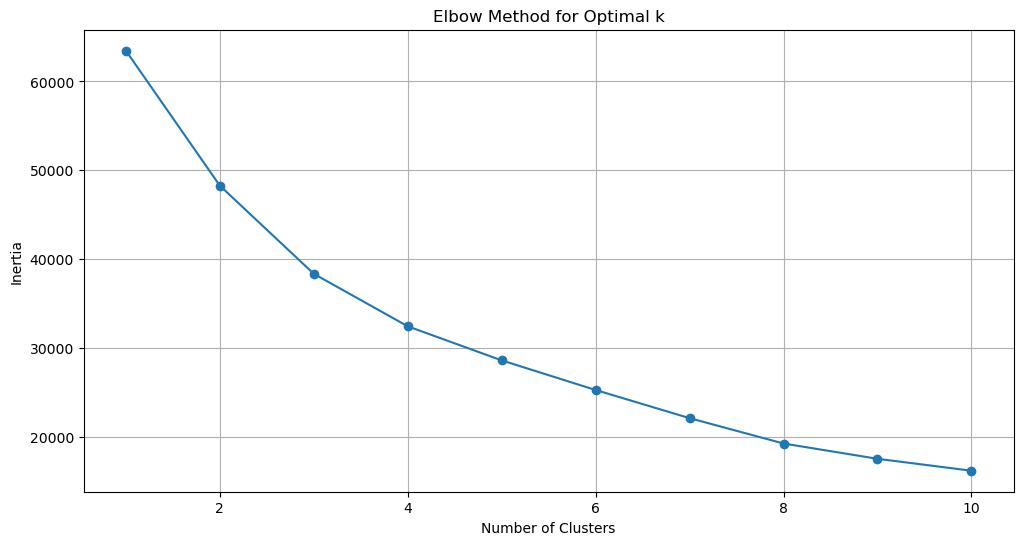

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 데이터 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# K-MeANS 클러스터링 및 엘보우 메소드
k_values = range(1, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# 엘보우 메소드 시각화
plt.figure(figsize=(12, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


## 4. 평가

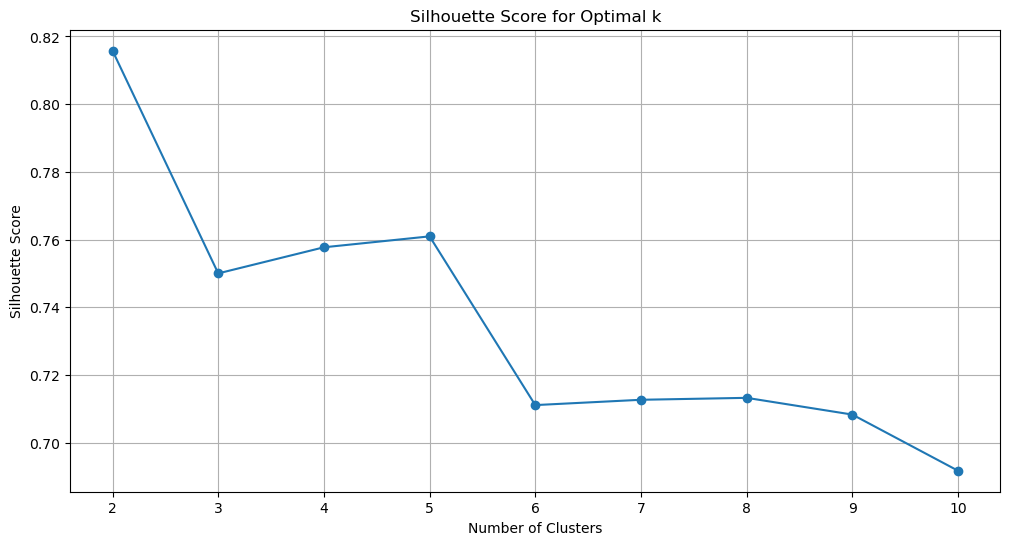

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  status_type_link  status_type_photo  \
0          1         1           0             False              False   
1          0         0           0             False               True   
2          1         0           0             False              False   
3          0         0           0             False               True   
4          0         0           0             False               True   

   status_type_status  status_type_video  cluster  
0               False       

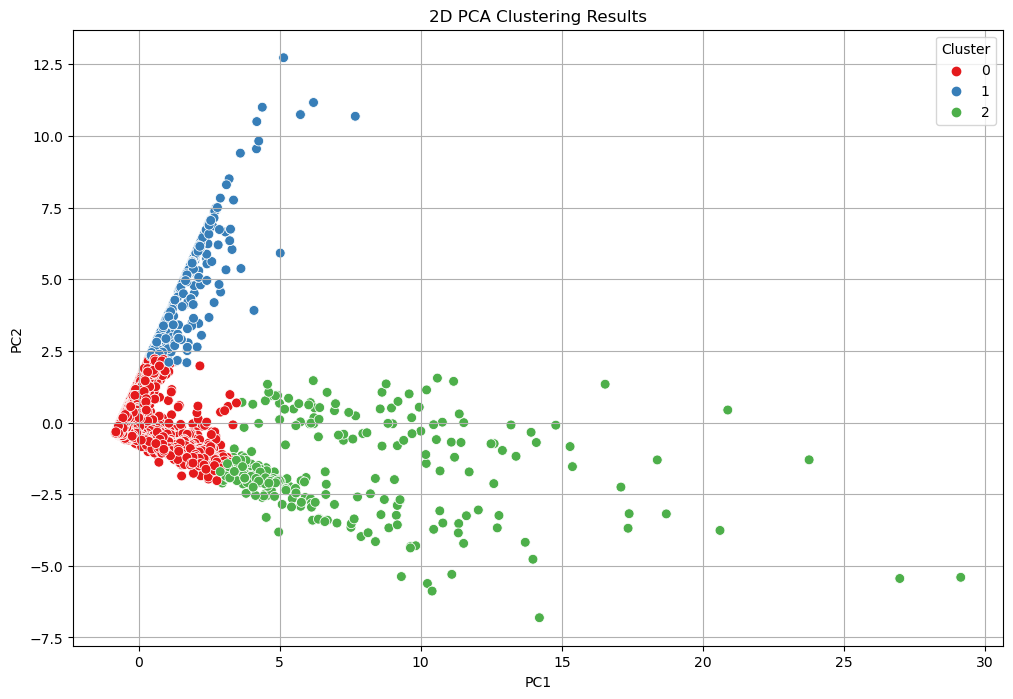

In [35]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Silhouette Score 계산 (클러스터 수가 2 이상인 경우에만)
silhouette_scores = []

for k in k_values:
    if k > 1:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(df_scaled)
        score = silhouette_score(df_scaled, cluster_labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)  # 클러스터 수가 1인 경우는 평가하지 않음

# Silhouette Score 시각화
plt.figure(figsize=(12, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.show()

# 최적 클러스터 수 선택 및 K-Means++ 클러스터링
optimal_k = 3  # 엘보우 메소드 또는 Silhouette Score 결과에 따라 최적의 k 선택
kmeans_plus = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df_encoded['cluster'] = kmeans_plus.fit_predict(df_scaled)

# 클러스터링 결과 확인
print(df_encoded.head())

# PCA를 사용한 2D 시각화
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca_df['cluster'] = df_encoded['cluster']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca_df, palette='Set1', s=50)
plt.title('2D PCA Clustering Results')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
